## SVM 支援向量機
將資料投射到更高維度的空間中，來找出超平面（hyperplane）以找出分界線<br>
為了找到超平面，SVM 會盡量拉帶超平面兩側的決策邊界，也就是超平面到某一分類資料點的最近距離。這些資料點就是「支援向量」<br><br>
硬邊界：將資料分的很清楚<br>
軟邊界：可以容許資料點出現在決策邊界中，視為誤差，本模型主要採用之方法

In [14]:
from sklearn.datasets import make_moons

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.model_selection import train_test_split

In [5]:
import matplotlib.pyplot as plt

## 隨機亂數功能 make_moons

make_moons(n_samples, n_features, centers, random_state)<br>
<br>n_samples: 幾筆資料<br>
noise: Standard deviation of Gaussian noise added to the data.<br>
random_state: 亂數種子（指定值可以是產生結果一致）<br>

In [15]:
dx, dy = make_moons(n_samples=500, noise=0.15, random_state=0) #dx: 特徵資料 dy:標籤
#print(dx)
#print(dy)
#print(dx.T[0]) -> https://ithelp.ithome.com.tw/articles/10195830

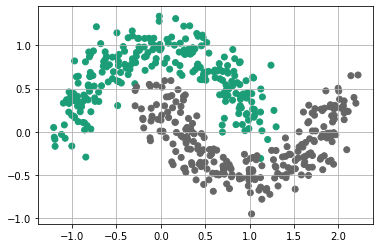

In [16]:
plt.scatter(dx.T[0], dx.T[1], c=dy, cmap='Dark2')
plt.grid(True)
plt.show()

## 資料標準化

目的：各個特徵的資料範圍可能很大，因此需要將資料調整到固定的範圍 <br>
<br>StandardScaler().fit_transform(data): 使平均數 = 0，變異數 = 1<br>
MinMaxScaler().fit_transform(data): 使資料特徵落在 0 到 1 之間<br>
RobustScaler().fit_transform(data): 類似 MinMaxScaler，若資料不在兩個分位點之間，會落在非 0 到 1 之間<br>
https://ithelp.ithome.com.tw/articles/10216967?sc=rss.iron

In [17]:
dx_std = StandardScaler().fit_transform(dx)

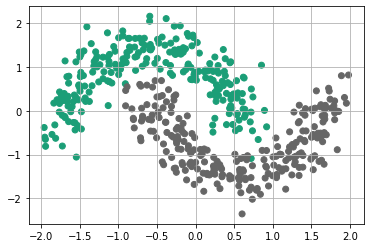

In [18]:
plt.scatter(dx_std.T[0], dx_std.T[1], c=dy, cmap='Dark2')
plt.grid(True)
plt.show()
# 中心點變為 0,0

## 分割訓練集


方法一：holdout 法<br>
抽取一部分資料集當作測試集，其餘作為訓練集

train_test_split(data, label, test_size, random_state)<br>
data: 特徵資料<br>
label: 標籤資料<br>
test_size: 測試集比例<br>
random_state: 亂數種子（指定值可以是產生結果一致）<br>

In [19]:
dx_train, dx_test, dy_train, dy_test = train_test_split(dx_std, dy, test_size=0.2, random_state=0)
print(dx.shape)
print(dx_train.shape)
print(dx_test.shape)
print(dy.shape)
print(dy_train.shape)
print(dy_test.shape)

(500, 2)
(400, 2)
(100, 2)
(500,)
(400,)
(100,)


## 線性 SVM 模型 

可以理解為畫一條直線

In [20]:
from sklearn.svm import LinearSVC

In [21]:
linear_svm = LinearSVC()

linear_svm.fit(dx_train, dy_train)

predictions = linear_svm.predict(dx_test)

In [22]:
print(linear_svm.score(dx_train, dy_train))
print(linear_svm.score(dx_test, dy_test))

0.8775
0.85


## 非線性 SVM 模型

可以理解為畫一條曲線

In [23]:
from sklearn.svm import SVC

In [24]:
svm = SVC()

svm.fit(dx_train, dy_train)

predictions = svm.predict(dx_test)

In [25]:
print(svm.score(dx_train, dy_train))
print(svm.score(dx_test, dy_test))

0.9825
0.99
